In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC

In [2]:
w=pd.read_csv('C:/Users/hp/Downloads/Github/dataset1-master/winedataset.csv')
wine=pd.DataFrame(w)
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

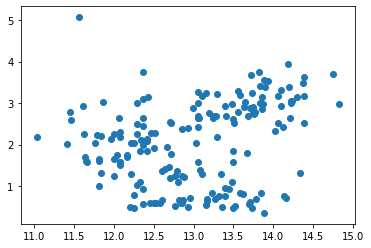

In [13]:
plt.scatter(wine['Alcohol'],wine['Flavanoids'])
plt.show()

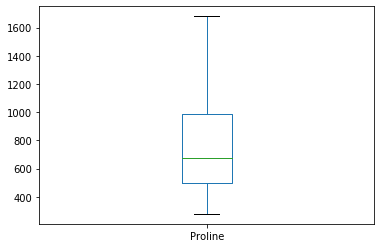

In [19]:
wine['Proline'].plot.box()

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [21]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [25]:
from scipy.stats import boxcox
wine['Magnesium']=boxcox(wine['Magnesium'],0)

In [26]:
wine['Proline']=boxcox(wine['Proline'],0)

In [28]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,4.593042,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,6.530303
std,0.775035,0.811827,1.117146,0.274344,3.339564,0.136627,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,0.415107
min,1.000000,11.030000,0.740000,1.360000,10.600000,4.248495,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,5.627621
25%,1.000000,12.362500,1.602500,2.210000,17.200000,4.477337,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,6.215606
50%,2.000000,13.050000,1.865000,2.360000,19.500000,4.584967,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,6.512486
75%,3.000000,13.677500,3.082500,2.557500,21.500000,4.672829,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,6.892642
max,3.000000,14.830000,5.800000,3.230000,30.000000,5.087596,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,7.426549


In [36]:
x=wine.iloc[:,1:]
y=wine.iloc[:,0]
svm=SVC()

In [37]:
import warnings
warnings.filterwarnings('ignore')
r_val=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_state)
    svm.fit(x_train,y_train)
    predsv=svm.predict(x_test)
    accuracy=accuracy_score(y_test,predsv)
    if accuracy > r_val:
        r_val=accuracy
        final_r=r_state
print("max r2 score corresponding to ",final_r," is ",accuracy)

max r2 score corresponding to  44  is  0.9661016949152542


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44)

from sklearn.model_selection import GridSearchCV
parameters=[{'kernel':['linear'],'C':[1,10,100]},{'kernel':['rbf'],'C':[1,10,100],'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid=GridSearchCV(svm,parameters)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9411764705882353
{'C': 1, 'kernel': 'linear'}


In [41]:
sv=SVC(kernel='linear')
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9830508474576272
[[21  0  0]
 [ 1 23  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        14

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.99        59
weighted avg       0.98      0.98      0.98        59



In [43]:
svscore=cross_val_score(svm,x,y,cv=5)
print(svscore.mean())

0.9504418704418705


In [44]:
from sklearn.externals import joblib

joblib.dump(svm,'wine_svm.obj')

['wine_svm.obj']